In [1]:
from meshed import DAG
from i2 import Sig


def foo(w, /, x: float, y="YY", *, z: str = "ZZ", **rest):
        pass


sig = Sig(foo)
d = DAG([foo])
#foo.__signature__=sig
d.__signature__


<Sig (w, /, x: float, y='YY', *, z: str = 'ZZ', rest={})>

In [10]:
d.__signature__(d)
#print(d.__signature__)

DAG(func_nodes=[FuncNode(w,x,y,z,rest -> foo_ -> foo)], name=None)

In [11]:
d.__signature__

<Signature (w, /, x: float, y='YY', *, z: str = 'ZZ', rest={})>

In [8]:
import inspect
inspect.signature(d)

<Sig (w, /, x: float, y='YY', *, z: str = 'ZZ', **rest)>

In [1]:
d.__signature__=sig

NameError: name 'DAG' is not defined

In [3]:
d.__signature__.names

['w', 'x', 'y', 'z', 'rest']

In [4]:
foo.__signature__ = Sig(foo)

In [5]:
foo.__signature__

<Sig (w, /, x: float, y='YY', *, z: str = 'ZZ', **rest)>

In [6]:
foo.__signature__.names

['w', 'x', 'y', 'z', 'rest']

In [16]:
def foo(x, y=1):
    return x + y



foo_dag = DAG([foo])
assert foo_dag(0) == 1
print(foo_dag.__signature__)
bar_dag = Sig(lambda x, y=2: None)(foo_dag)  # changes __signature__

bar_dag.__signature__
# bar_dag.sig = Sig(bar_dag)  # changed it manually
#assert str(Sig(bar_dag)) == "(x, y=2)"
#assert bar_dag(0) == 2  # Correct result after above change in dag._call
#assert True

<class 'i2.signatures.Sig'>
(x, y=1)


<Signature (x, y=2)>

In [3]:
from meshed import DAG
from i2 import Sig

def foo(x, y=1):
    return x + y

foo_dag = DAG([foo])
assert foo_dag(0) == 1
bar_dag = Sig(lambda x, y=2: None)(foo_dag)
assert str(Sig(bar_dag)) == '(x, y=2)'
assert bar_dag(0) == 2 # BUT WE WANT THIS TO BE 2

# binding issue 19

In [32]:
def foo(a, b):
    return a + b

def bar(x, y):
    return  x * y

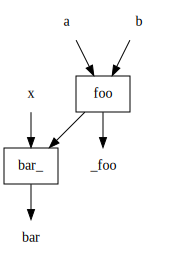

In [33]:
from meshed import DAG, FuncNode
from i2 import Sig

dag = DAG([
    FuncNode(foo, name='foo'),
    FuncNode(bar, bind={'y': 'foo'})
])
#assert str(Sig(dag)) == '(foo, x, a, b)'  # ?!?!
#assert dag(9,1,2,3) == (9, 5) 
dag.dot_digraph()

In [44]:
[node.name for node in dag.func_nodes]

['bar_', 'foo']

In [49]:
def bindings_cleaner(self):
    funcnodes_names =  [node.name for node in self.func_nodes]
    func = lambda v: self._func_node_for[v].out
    cond = lambda k,v: v in funcnodes_names
    for node in self.func_nodes:
        
        node.bind = change_value_on_cond(d, cond, func)

        
    
def change_value_on_cond(d, cond, func):
    for k,v in d.items():
        if cond(k,v):
            d[k]=func(v)
    return d




FuncNode(bar, bind={'y': 'foo'}).bind


{'y': 'foo', 'x': 'x'}

In [51]:
d = {'a':12, 'b':23}
cond = lambda k,v: v>20
func = lambda x:2*x
dd = change_value_on_cond(d, cond, func)

In [52]:
dd

{'a': 12, 'b': 46}

In [42]:
FuncNode(foo, name='foo').name

'foo'

In [47]:
nn = dag._func_node_for[foo]
nn

FuncNode(a,b -> foo -> _foo)

In [39]:
dag._func_node_for['foo'].out

'_foo'

In [16]:
from qo import ddir

In [38]:
ddir(nn)

['bind',
 'call_on_scope',
 'extractor',
 'from_dict',
 'func',
 'func_label',
 'has_as_instance',
 'name',
 'names_maker',
 'node_validator',
 'out',
 'sig',
 'synopsis_string',
 'to_dict']

In [23]:
vars(dag)

{'func_nodes': [FuncNode(y=foo,x -> bar_ -> bar),
  FuncNode(a,b -> foo -> _foo)],
 'cache_last_scope': True,
 'parameter_merge': <function meshed.util.conservative_parameter_merge(params, same_kind=True, same_default=True, same_annotation=True)>,
 'new_scope': dict,
 'name': None,
 'extract_output_from_scope': <function meshed.util.extract_values(d: dict, keys: Iterable)>,
 'graph': {'a': [FuncNode(a,b -> foo -> _foo)],
  'b': [FuncNode(a,b -> foo -> _foo)],
  FuncNode(a,b -> foo -> _foo): ['_foo'],
  'foo': [FuncNode(y=foo,x -> bar_ -> bar)],
  'x': [FuncNode(y=foo,x -> bar_ -> bar)],
  FuncNode(y=foo,x -> bar_ -> bar): ['bar']},
 'nodes': ['x',
  'foo',
  FuncNode(y=foo,x -> bar_ -> bar),
  'bar',
  'b',
  'a',
  FuncNode(a,b -> foo -> _foo),
  '_foo'],
 'var_nodes': ['x', 'foo', 'bar', 'b', 'a', '_foo'],
 '__signature__': <Sig (foo, x, a, b)>,
 'roots': ('foo', 'x', 'a', 'b'),
 'leafs': ('bar', '_foo'),
 'last_scope': None}

In [11]:
node =     FuncNode(foo, name='foo')

In [12]:
node.bind

{'a': 'a', 'b': 'b'}

In [13]:
node.out

'_foo'

In [14]:
str(Sig(dag))

'(a, b, x)'

In [30]:
def foo(x): return x + 1
def bar(x): return x * 2
dag = DAG([
             FuncNode(foo, out='foo_output'),
             FuncNode(bar, name='B', out='b', bind={'x': 'foo_output'}),
         ])

        #A ``FuncNode`` instance is indexed by both its identifier (``.name``) as well as
        #the identifier of it's output (``.out``):

dag._func_node_for['foo_output']
#        FuncNode(x -> foo -> foo_output)
dag._func_node_for['foo']
#        FuncNode(x -> foo -> foo_output)
dag._func_node_for['b']
#        FuncNode(x=foo_output -> B -> b)
dag._func_node_for['B']
#        FuncNode(x=foo_output -> B -> b)

FuncNode(x=foo_output -> B -> b)

# Duplicate names error

In [ ]:
def mk_func_name(func, exclude_names=()):
    name = getattr(func, '__name__', '')
    if name == '<lambda>':
        name = lambda_name()  # make a lambda name that is a unique identifier
    elif name == '':
        if isinstance(func, partial):
            return mk_func_name(func.func, exclude_names)
        else:
            raise NameValidationError(f"Can't make a name for func: {func}")
    return find_first_free_name(name, exclude_names)

In [5]:
from meshed.dag import mk_func_name

In [1]:
from meshed import DAG, FuncNode

def foo(x):
    return x + 1

t = foo

def foo(y):
    return y * 2

tt = foo

d = DAG([t, tt])
d.func_nodes
f, ff = d.func_nodes
f.func_label, ff.func_label

('foo_', 'foo_')

In [2]:
d.func_nodes

[FuncNode(y -> foo_ -> foo), FuncNode(x -> foo_ -> foo)]

In [3]:
d.func_nodes

[FuncNode(y -> foo_ -> foo), FuncNode(x -> foo_ -> foo)]

In [3]:
names = [node.name for node in d.func_nodes]
names

['foo_', 'foo_']

In [6]:
from meshed.dag import mk_nodes_names_unique, ch_names
self = d
old_nodes = self.func_nodes
funcnodes_names = mk_nodes_names_unique(old_nodes)
dict_renamer = {
    old_name: new_name for old_name, new_name in zip(old_names, funcnodes_names)
}
self.func_nodes = ch_names(old_nodes, renamer=dict_renamer)
self.func_nodes

[FuncNode(y -> foo_ -> foo), FuncNode(x -> foo_ -> foo)]

In [ ]:
from meshed.dag import find_first_free_name
def mk_nodes_names_unique2(nodes, exclude_names=()):
    names = [node.name for node in nodes]

    def gen():
        _exclude_names = exclude_names
        for name in names:
            if name not in _exclude_names:
                yield name
            else:
                found_name = find_first_free_name(
                    f'{func_name}__{name}', _exclude_names
                )
                yield found_name
                _exclude_names = _exclude_names + (found_name,)

    return list(gen())

In [12]:
mk_nodes_names_unique(old_nodes)

['foo_', 'foo_']

In [10]:
def mk_names_unique(funcs):
    renamed = []
    for func in funcs:
        name = getattr(func, '__name__', '')
        if name not in renamed:
            new_name=name
        else:
            new_name =mk_func_name(func, exclude_names=renamed)
        renamed.append(new_name)

    return renamed

In [13]:
def mk_nodes_names_unique(nodes, exclude_names=()):
    names = [node.name for node in nodes]

    def gen():
        _exclude_names = exclude_names
        for name in names:
            if name not in _exclude_names:
                yield name
            else:
                found_name = find_first_free_name(
                    f"{func_name}__{name}", _exclude_names
                )
                yield found_name
                _exclude_names = _exclude_names + (found_name,)

    return list(gen())

In [14]:
funcs = [node.func for node in d.func_nodes]
mk_nodes_names_unique(d.func_nodes)

['foo_', 'foo_']

In [12]:
funcs

[<function __main__.foo(y)>, <function __main__.foo(x)>]